Use the wine data to conduct Principal Component Analysis. The URL is https://archive.ics.uci.edu/ml/'machine-learning-databases/wine/wine.data

In [2]:
import pandas as pd
column_names = ['classes','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=column_names)

What are the features?

In [3]:
df.columns

Index(['classes', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

Split the dataset into training and test sets (30%). Standardize the features.

In [4]:
from sklearn.model_selection import train_test_split
X=df.drop('classes',axis=1)
y=df['classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

Use the linalg.eig function from NumPy to obtain the eigenpairs of the Wine covariance matrix. Print the eigenvalues.

In [6]:
import numpy as np
matrix = np.cov(X_train1.T)
eigen_values, eigen_vectors = np.linalg.eig(matrix)

In [7]:
eigen_values

array([4.65772379, 2.69091171, 1.33368544, 1.0826291 , 0.83181914,
       0.59944659, 0.55695044, 0.09613155, 0.35845013, 0.15788312,
       0.23577773, 0.25393957, 0.25034275])


Compute and plot the individual explained variance and the cumulative explained variance (range from 1 to 14). Using the NumPy cumsum function, calculate the cumulative sum of explained variances, which you will then plot via Matplotlib's step function. Explain the outcomes.


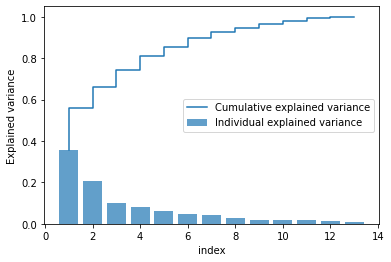

In [16]:
import matplotlib.pyplot as plt
total = sum(eigen_values)
variance = [(i / total) for i in sorted(eigen_values, reverse=True)]
cumulative_sum = np.cumsum(variance)

plt.bar(range(1,14), variance, alpha=0.9, label='Individual Explained Variance')
plt.step(range(1,14), cumulative_sum,
         label='Cumulative Explained Variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component Index')
plt.legend()
plt.show()

<i>The graph depicts the variances of individual companents. According to the graph, the first component accounts to 40% of variance.

Sort the eigenpairs by decreasing order of the eigenvalues. Make a list of (eigenvalue, eigenvector) tuples. Sort the (eigenvalue, eigenvector) tuples from high to low. Print the projection matrix W.

In [22]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [24]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w

array([[ 0.15323165, -0.48408288],
       [-0.24599788, -0.18870195],
       [-0.01182049, -0.3298186 ],
       [-0.25356961, -0.0074867 ],
       [ 0.14799959, -0.31282079],
       [ 0.3942736 , -0.0472557 ],
       [ 0.43145705,  0.0130822 ],
       [-0.29282317, -0.05780993],
       [ 0.31447115, -0.03020308],
       [-0.06146361, -0.53125386],
       [ 0.2726769 ,  0.26705186],
       [ 0.3724572 ,  0.19460696],
       [ 0.29421887, -0.35395544]])

Using the projection matrix, transform a sample x onto the PCA subspace. Transforming the entire 124 x 13-dimensional training dataset onto the two principal components by calculating the matrix dot product.

In [11]:
X_train2 = X_train1.dot(w)

Visualize the transformed Wine training set into a two-dimensional scatterplot. Import ListedColormap. Set up marker generator and color map. Plot the decision surface and plot the class samples.

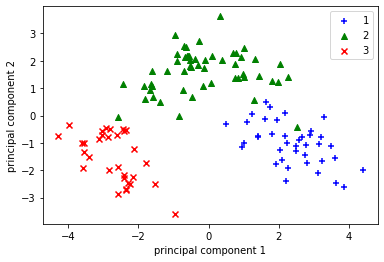

In [21]:
from matplotlib.colors import ListedColormap
colors = ['b','g', 'r']
markers = ['+', '^', 'x']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train2[y_train==l, 0], 
                X_train2[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.show()

Import LogisticRegression and PCA. Visualize the decision regions 

In [13]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

X_train4 = pca.fit_transform(X_train1)
X_test4 = pca.transform(X_test1)
lr.fit(X_train4, y_train)

LogisticRegression(solver='liblinear')

In [28]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
  
    markers = ('+', 'x', 'o', '^', '*')
    colors = ('gray','orange','red', 'blue','green', )
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)




C:\Users\ROHITH~1\AppData\Local\Temp/ipykernel_17276/1220731953.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\ROHITH~1\AppData\Local\Temp/ipykernel_17276/1220731953.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


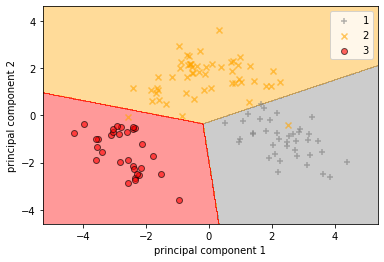

In [29]:
plot_decision_regions(X_train4, y_train, classifier=lr)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.show()